# Descripción del proyecto

Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

## Diccionario de datos 

- 1. DataSet 1 Hipótesis: 

* Hypotheses: breves descripciones de las hipótesis.
* Reach: alcance del usuario, en una escala del uno a diez.
* Impact: impacto en los usuarios, en una escala del uno al diez.
* Confidence: confianza en la hipótesis, en una escala del uno al diez.
* Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.


- 2. DataSet 2 Pedidos:

* transactionId: identificador de pedido.
* visitorId: identificador del usuario que realizó el pedido.
* date: fecha del pedido.
* revenue: ingresos del pedido.
* group: el grupo del test A/B al que pertenece el usuario.


- 3. DataSet 3 Visitas:

* date: la fecha.
* group: grupo de la prueba A/B.
* visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.

## Leer los datasets

In [1]:
# importar librerias 
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import datetime as dt 
import matplotlib.pyplot as plt 

In [2]:
hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

## Pre-procesar los datos 

### DataSet Hipotesis

In [3]:
# declarar funcion para obtener informacion de los DF
def leer_data(data):
    print(data.head())
    data.info()
    print(data.describe())

In [4]:
leer_data(hipotesis)

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ 

In [5]:
# declarar funcion pala 
def limpiar_datos(data):
    new_columns = []
    for columna in data.columns:
        columna_limpia = columna.lower()
        new_columns.append(columna_limpia)
    data.columns = new_columns

    return data.head()

In [6]:
limpiar_datos(hipotesis)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [7]:
# funcion para obtener duplicados y ausentes 
def valores_df(data):
    valores_duplicados = data.duplicated().sum()
    valores_ausentes = data.isna().sum()
    print(f'Los valores duplicados del DF son: {valores_duplicados}')
    print(f'Los valores ausentes del DF son: {valores_ausentes}')

In [8]:
valores_df(hipotesis)

Los valores duplicados del DF son: 0
Los valores ausentes del DF son: hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64


### DataSet Pedidos

In [9]:
leer_data(orders)

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03   1197.000000
mean    2.155621e+09  2.165960e+09    131.491646
std     1.229085e+09  1.236014e+09    60

In [10]:
valores_df(orders)

Los valores duplicados del DF son: 0
Los valores ausentes del DF son: transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [11]:
# convertir los datos de la columna date a a date
orders['date'] = orders['date'].map(lambda x : dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


### DataSet Visitas 

In [13]:
leer_data(visits)

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
           visits
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000


In [14]:
valores_df(visits)

Los valores duplicados del DF son: 0
Los valores ausentes del DF son: date      0
group     0
visits    0
dtype: int64


In [15]:
# cambiar el tipo de dato de la columna date
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<span style="color:blue; font-weight:bold">
En el pre procesamiento de datos, no se encontraron errores mayores, lo unico que se realizo fue convertir las mayusculas en minusculas en el DF Hipotesis, en el DF Orders se cambio el tipo de dato de la columna 'date' a datetime misma situacion para el DF Visits. En cuanto a valores duplicados o ausentes no se encontro ninguno en algun dataSet

</span>

## Priorizar hipótesis 

In [16]:
# Framework ICE 
hipotesis['ICE'] = (hipotesis['impact'] * hipotesis['confidence']) / hipotesis['effort']

In [17]:
hipotesis.sort_values(by='ICE', ascending=False)  

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


In [18]:
# Framework RICE 
hipotesis['RICE'] = (hipotesis['reach'] * hipotesis['impact'] * hipotesis['confidence']) / hipotesis['effort']

In [19]:
hipotesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


### Grafica de barras comparando los puntajes obtenidos en ICE y RICE

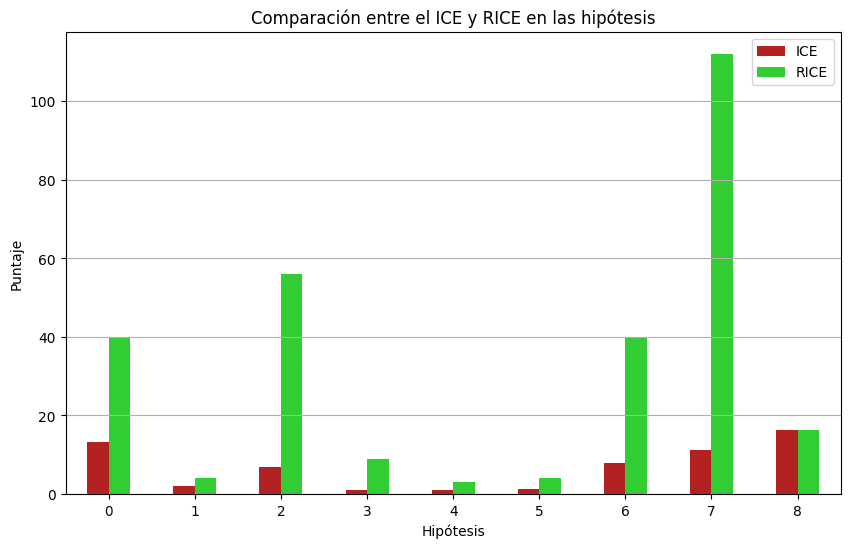

In [20]:
# seleccionar columnas del DF hipotesis
ice_rice = ['ICE', 'RICE']
# grafica de barras con valores ICE y RICE 
hipotesis.plot(
    y=ice_rice,
    kind='bar',
    title='Comparación entre el ICE y RICE en las hipótesis', 
    figsize=(10,6),
    xlabel='Hipótesis',
    ylabel='Puntaje', 
    rot=1, 
    color=('firebrick', 'limegreen'))

plt.grid(axis='y')
plt.show()

<span style="color:blue; font-weight:bold">
Al utilizar RICE en lugar de ICE, la principal diferencia es que RICE incluye el 'Alcance' (Reach). Esto puede hacer que algunas hipótesis que afectan a una mayor cantidad de usuarios sean priorizadas más alto en RICE. Las hipótesis con un gran impacto pero con un alcance pequeño pueden bajar en la lista cuando se utiliza RICE.

</span>

## Análisis del test A/B

### Ingreso acumulado por grupo

In [21]:
# matriz con valores unicos
datesGroups = orders[['date', 'group']].drop_duplicates()

In [22]:
# aplicar metodos a cada grupo, ordenar los resultados por columnas date y group 
orderAgg = datesGroups.apply(
    lambda x: orders[
        np.logical_and(orders['date'] <= x['date'], 
                       orders['group']== x['group'])
    ].agg({
        'date':'max',
        'group':'max',
        'transactionId':pd.Series.nunique,
        'visitorId':pd.Series.nunique,
        'revenue':'sum'
    }),
    axis=1
).sort_values(by=['date','group'])

In [23]:
visitorAgg = datesGroups.apply(
    lambda x: visits[
        np.logical_and(visits['date'] <= x['date'], visits['group']== x['group'])
    ].agg({
        'date':'max',
        'group':'max',
        'visits':'sum'
    }),
    axis=1
).sort_values(by=['date','group'])

In [24]:
# fusionar las tablas en una y renombrar columnas 
dataAcomulada = orderAgg.merge(visitorAgg, on=['date','group'], how='outer')
dataAcomulada.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [25]:
# crear filtros para cada uno de los grupos 
dataA = dataAcomulada.query('group =="A"')[['date', 'revenue','orders']]

dataB = dataAcomulada.query('group =="B"')[['date', 'revenue','orders']]

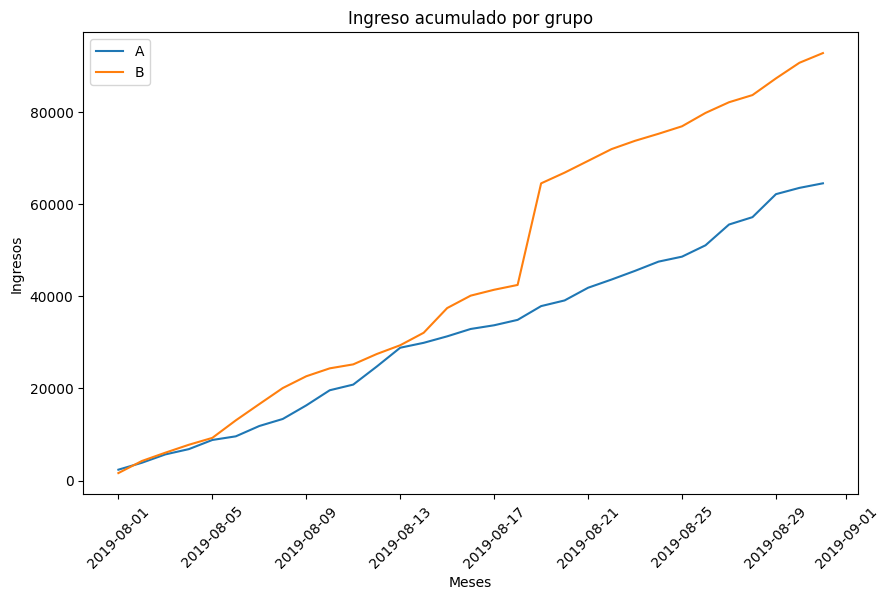

In [26]:
# Crear graficos 
plt.figure(figsize=(10,6))

plt.plot(dataA['date'], dataA['revenue'], label='A')

plt.plot(dataB['date'], dataB['revenue'], label='B')

plt.title('Ingreso acumulado por grupo')
plt.xlabel('Meses')
plt.ylabel('Ingresos')
plt.legend()
plt.xticks(rotation=45)
plt.show()

<span style="color:blue; font-weight:bold">
En el grafico de ingresos acomulados por grupo se observa de manera general que el grupo B tiene un mejor ingreso que el grupo A, cabe destacar que en los primeros meses del experimento los ingresos son casi iguales, sin embargo a partir del 2019-08-17 comenzo un incremento exponencial en el grupo B alejandolo por mucho de los ingresos del Grupo A.

</span>

### Tamaño de pedido promedio acumulado por grupo

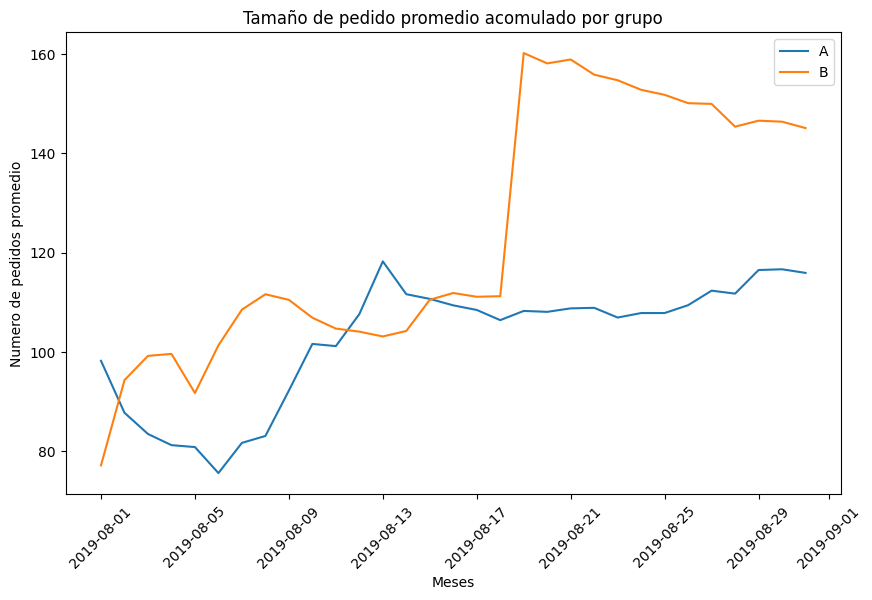

In [27]:
plt.figure(figsize=(10,6))

plt.plot(dataA['date'], dataA['revenue'] / dataA['orders'], label='A')
plt.plot(dataB['date'], dataB['revenue'] / dataB['orders'], label='B')

plt.title('Tamaño de pedido promedio acomulado por grupo')
plt.xlabel('Meses')
plt.ylabel('Numero de pedidos promedio')
plt.legend()
plt.xticks(rotation=45)

plt.show()

<span style="color:blue; font-weight:bold">
En este grafico los pedidos promedios del Grupo A tienen una tendencia a la baja en los primeras semanas del experimento, sin embargo en la semana del 2019-08-13 se observa una alza, despues de ello se mantiene y no vuelve a presentar una disminucion considerable en los pedidos promedio, por otra parte el Grupo B, tiene un mejor desempeño 
en el numero de pedidos, sin embargo en la semana donde el Grupo A tuvo un aumento considerable el Grupo B disminuye el numero de pedidos, lo que podria significar que la estrategia de marketing fue mas efectiva para esa semana, sin embargo despues en la semana del 2019-08-17 nuevamente el Grupo B tiene un mejor desempeño y aumenta exponencialmente, como se observó en el grafico anterior.
</span>

###  Diferencia relativa en el tamaño de pedido promedio acomulado del grupo B comparado con el grupo A

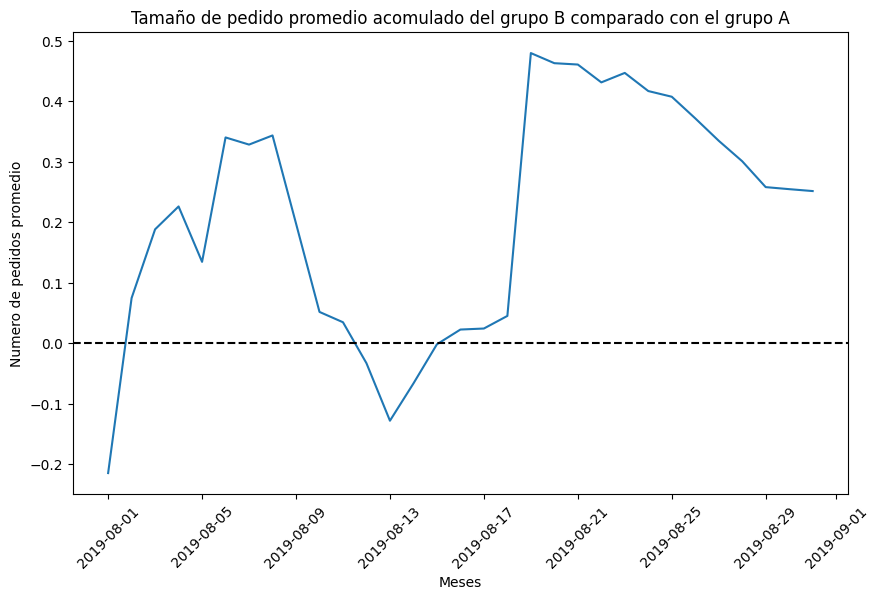

In [28]:
# unir los datos en un DF
relativaAcomulada = dataA.merge(dataB, left_on='date', right_on='date', how='left', suffixes=['A','B'])

# trazar grafico
plt.figure(figsize=(10,6))
plt.plot(
    relativaAcomulada['date'], 
    (relativaAcomulada['revenueB'] / relativaAcomulada['ordersB']) / 
    (relativaAcomulada['revenueA'] / relativaAcomulada['ordersA'])
        -1 )
plt.title('Tamaño de pedido promedio acomulado del grupo B comparado con el grupo A')
plt.xlabel('Meses')
plt.ylabel('Numero de pedidos promedio')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

<span style="color:blue; font-weight:bold">
En este grafico se observa lo mismo antes mencionado en el grafico de pedidos promedio por grupos. Primero el Grupo B va incrementando el numero de pedidos en la semana 2019-08-05 se observa una caida, sin embargo para la siguiente semana vuelve a haber una alza alcanzando un 30% mas que el Grupo A, pero apartir de la semana 2019-08-09 existio una tendencia a la baja, como se comento anteriormente esto se puede deber a que la estrategia de marketing del Grupo A fue mejor para esta semana y la siguiente, sin embargo a partir de la semana 2019-08-17 hubo un crecimiento exponencial, distanciando por mucho la cantidad de pedidos promedio entre cada grupo.
</span>

### Tasa de conversión de cada grupo

In [29]:

# calcular la conversion acomulada
dataAcomulada['conversion'] = dataAcomulada['orders'] / dataAcomulada['visitors']

# filtrar por grupo A y B 
dataAcomuladaA = dataAcomulada[dataAcomulada['group']=='A']

dataAcomuladaB = dataAcomulada[dataAcomulada['group']=='B']

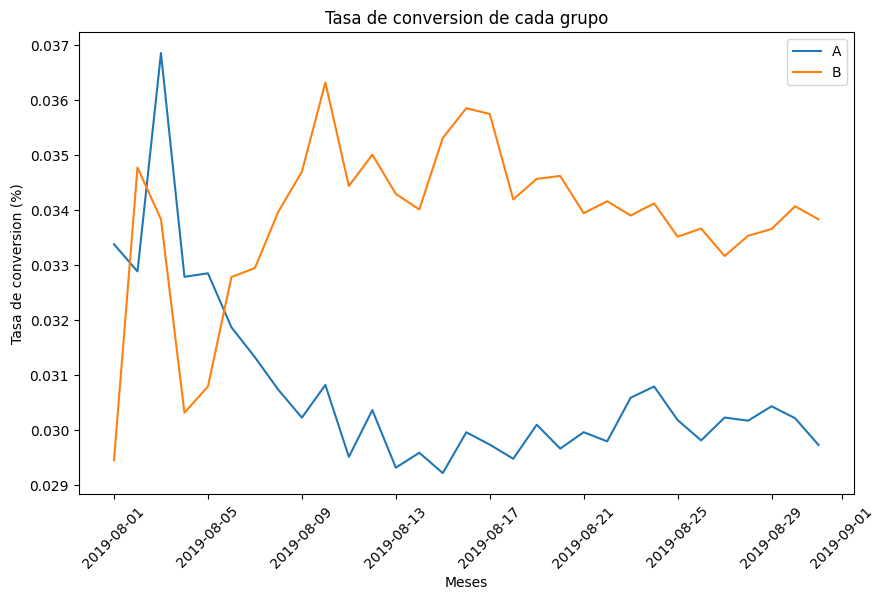

In [30]:
# trazar graficos 
plt.figure(figsize=(10,6))
plt.plot(dataAcomuladaA['date'], dataAcomuladaA['conversion'], label='A')
plt.plot(dataAcomuladaB['date'], dataAcomuladaB['conversion'], label='B')

plt.title('Tasa de conversion de cada grupo')
plt.xlabel('Meses')
plt.ylabel('Tasa de conversion (%)')
plt.legend()
plt.xticks(rotation=45)

plt.show()

<span style="color:blue; font-weight:bold">
En cuanta a la tasa de conversion logramos observar en el grafico que el grupo B arroja mejores resultados que el grupo A, aunque en las primeras semanas del 2019-08-01 al 2019-08-05 el grupo A tenia una mejor tasa, a partir de la siguiente semana el Grupo B incremento y se mantuvo a lo largo del experiemento, lo que indica que podria indicar que la estrategia de marketing es mejor para dicho grupo.
</span>

In [31]:
# Diferencias relativas para las tasas de conversion acomuladas
conversionAcomulada = dataAcomuladaA[['date','conversion']].merge(
    dataAcomuladaB[['date','conversion']],
    left_on='date', 
    right_on='date',
    suffixes=['A','B']
)

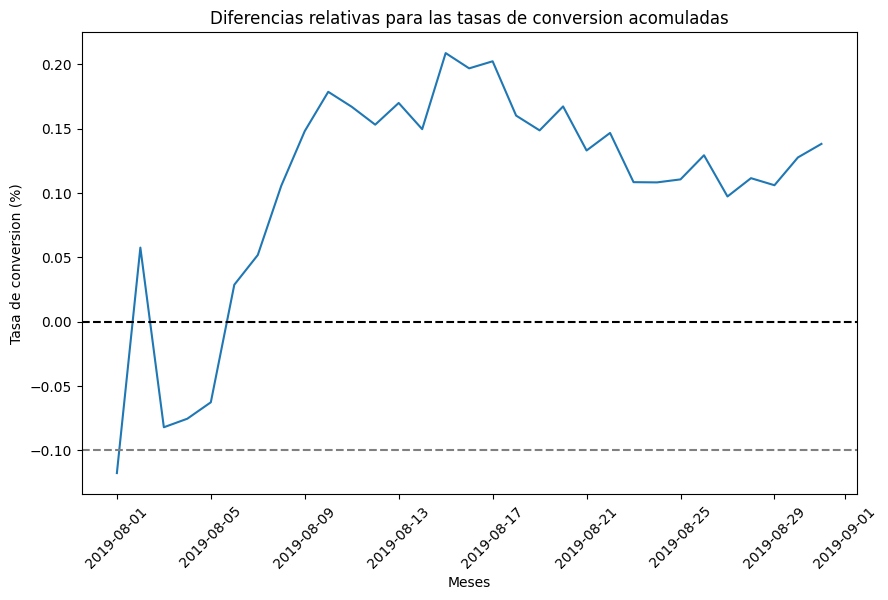

In [32]:
# trazar grafico 
plt.figure(figsize=(10,6))

plt.plot(
    conversionAcomulada['date'],
    conversionAcomulada['conversionB'] 
    / conversionAcomulada['conversionA']
    -1)
plt.xticks(rotation=45)

plt.title('Diferencias relativas para las tasas de conversion acomuladas')
plt.xlabel('Meses')
plt.ylabel('Tasa de conversion (%)')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='gray', linestyle='--')

plt.show()

<span style="color:blue; font-weight:bold">
En este grafico se observa la tasa de conversion del Grupo B se mantiene estable a partir de la semana 2019-08-05 alcanzando mas de un 20% de conversion que el grupo A, lo que podria indicar que el experimento esta teniendo los resultados esperados
</span>

### Grafico de dispersión del número de pedidos por usuario

In [33]:
# calcular los pedidos de los usuarios
order_users = orders.groupby('visitorId').size().reset_index(name='order_count')

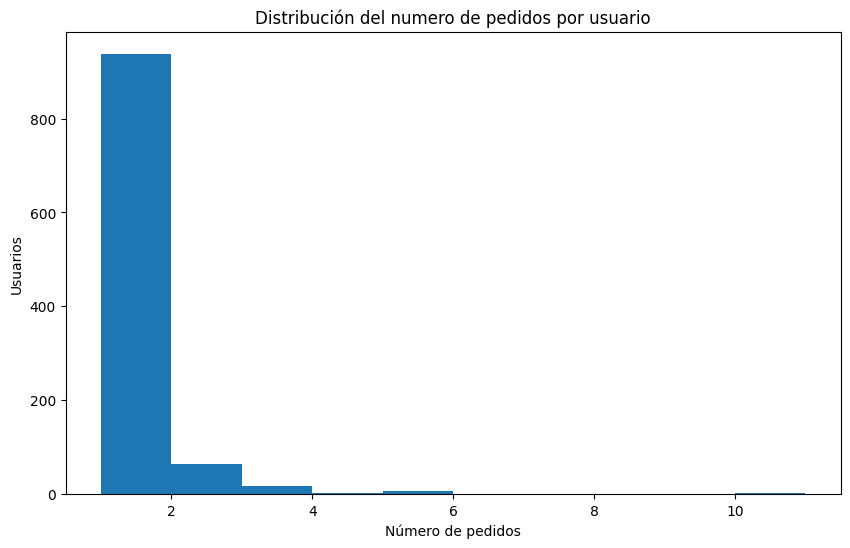

In [34]:
# investigar la distribucion de el numero de pedidos por usuario

plt.figure(figsize=(10,6))
plt.hist(order_users['order_count'])

plt.title('Distribución del numero de pedidos por usuario')
plt.xlabel('Número de pedidos')
plt.ylabel('Usuarios')
plt.show()

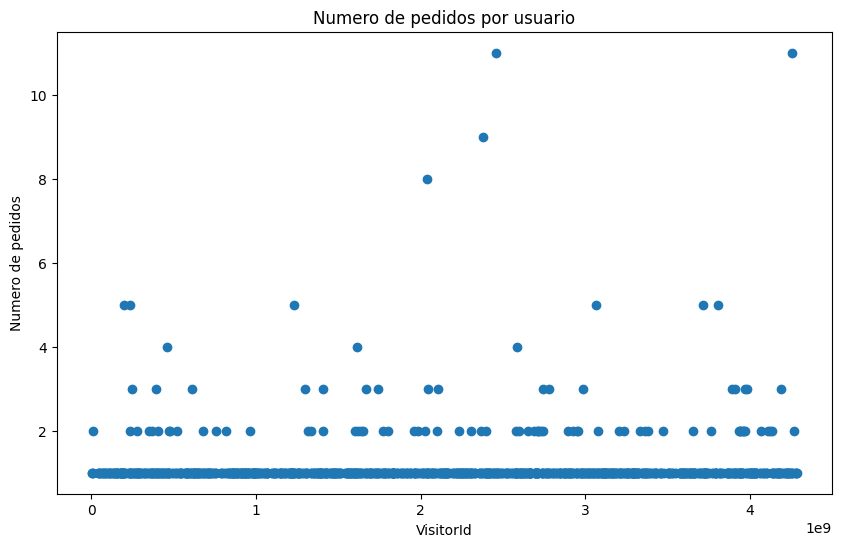

In [35]:
# crear grafico de dispersion
plt.figure(figsize=(10,6))
plt.scatter(order_users['visitorId'], order_users['order_count'])

plt.title('Numero de pedidos por usuario')
plt.xlabel('VisitorId')
plt.ylabel('Numero de pedidos')

plt.show()

<span style="color:blue; font-weight:bold">
En los graficos de distribución anteriores se observa que el los usuarios tienen en promedio un total de 2 pedidos, tambien se observa que hay usuarios que pueden tener 4 pedidos y algunos pocos mas de 6 pedidos en adelante, esto se confirmara al calcular los percentiles.

</span>

### Calculo de percentiles del numero de pedidos por usuario

In [36]:
print(np.percentile(order_users['order_count'], [90,95,99,100]))

[ 1.  2.  4. 11.]


<span style="color:blue; font-weight:bold">
Al calcular los percentiles se obtiene que un 90% de los usuarios tienen por lo menos 1 pedido, el 5% tienen 2 pedidos, el 1% tienen 4 pedidos, y se observan valores atipicos de usuarios donde solicitan hasta 11 pedidos. 
</span>

### Grafico de dispersion de los precios de los pedidos

In [37]:
# Grafico de dispersion de los precios de los pedidos
xvalues = pd.Series(range(0, len(orders['revenue'])))

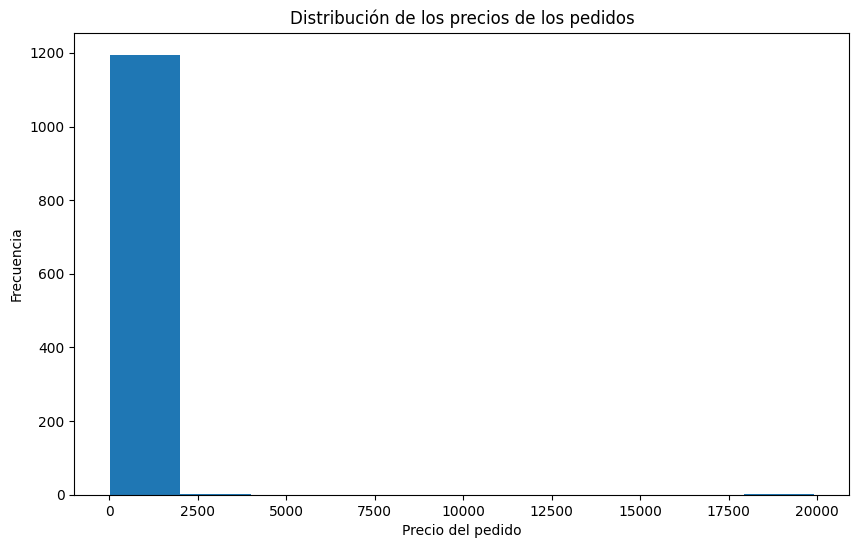

In [38]:
# investigar la distribucion de los precios de los pedidos 
plt.figure(figsize=(10,6))
plt.hist(orders['revenue'])

plt.title('Distribución de los precios de los pedidos')
plt.xlabel('Precio del pedido')
plt.ylabel('Frecuencia')
plt.show()

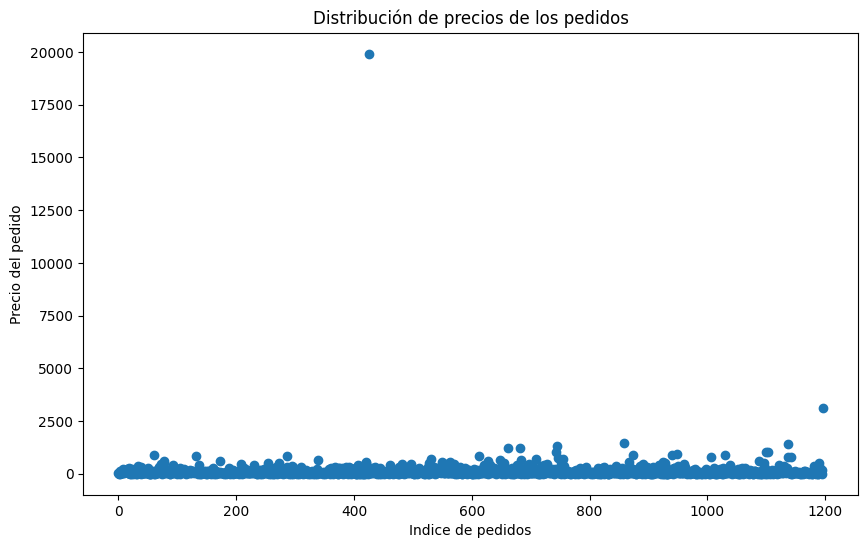

In [39]:
# grafico de dispersion
plt.figure(figsize=(10,6))
plt.scatter(xvalues, orders['revenue'])

plt.title('Distribución de precios de los pedidos')
plt.ylabel('Precio del pedido')
plt.xlabel('Indice de pedidos')

plt.show()

<span style="color:blue; font-weight:bold">
En estos graficos se observa que la frecuencia de los pedidos esta en los que tienen un valor menor a $250, en estos graficos no observan tantos valores atipicos. 

</span>

###  Calcular percentiles de los precios de pedidos

In [40]:
print(np.percentile(orders['revenue'], [90,95,99,100]))

[  282.48    435.54    900.904 19920.4  ]


<span style="color:blue; font-weight:bold">
Al realizar el calculo de los percentiles se puede concluir que el 90% de los usuarios piden productos con un costo de 282.48, el 5 por ciento  de los usuarios piden productos con un valor de 435.54 y un 1% piden productos con unn valor de $900.904. Por ultimo hay un usuario que pidio productos con un valor de 19920.4. Este usuario y los del 1 porciento podrian ser considerados para recibir alguna recompensa.
</span>

### Significancia estadística de la diferencia en la conversion entre los grupos con datos brutos

In [41]:
# crear variables con las ordenes por usuario de acuerdo al grupo
ordersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
# renombrar las columnas 
ordersA.columns= ['userId', 'orders']

In [42]:
ordersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
# renombrar las columnas 
ordersB.columns= ['userId', 'orders']

In [43]:
# crear variables Sample para crear una series con puntaje 0 si es que no tuvieron pedidos, necesario para la prueba
# U de Mann
sampleA = pd.concat(
    [
        ordersA['orders'],
        pd.Series(0,
                  index=np.arange(visits[visits['group'] =='A']['visits'].sum() - len(ordersA['orders'])),
                  name='orders'
                 )
    ],
    axis=0
)

In [44]:
sampleB = pd.concat(
    [
        ordersB['orders'],
        pd.Series(0,
                  index=np.arange(visits[visits['group'] =='B']['visits'].sum() - len(ordersB['orders'])),
                  name='orders'
                 )
    ],
    axis=0
)

In [45]:
# imprimir la ganancia relativa de conversion
print("P-valor: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Ganancia relativa en la conversión: {0:.3f}".format(sampleB.mean() / sampleA.mean()-1))

P-valor: 0.017
Ganancia relativa en la conversión: 0.138


<span style="color:blue; font-weight:bold">
Al realizar la prueba U de Mann se obtuvo que el valor p es de 0.017 lo que es menor que un alpha de 0.05 lo que indica que hay una diferencia significativa en las distribuciones de las conversiones entre los Grupos A y B. 
 Por otra parte se obtuvo un valor de 0.138 lo que indica queel grupo B tuvo aproximadamente un 13.8% de mayor ganancia en la tasa de conversion sobre el Grupo A. Esto indica que la estrategia de marketing del Grupo B tiene mejores resultados, como se observo en los graficos anteriores
</span>

### Significancia estadistica de la diferencia en el tamaño promedio de pedidos entre los grupos utilizando datos en bruto


In [46]:
print('P-valor: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))

print('Ganancia relativa en el tamaño promedio de pedidos: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1))

P-valor: 0.692
Ganancia relativa en el tamaño promedio de pedidos: 0.252


<span style="color:blue; font-weight:bold">
Sin embargo al realizar la prueba U de Mann para el tamaño promedio de pedidos, se encontro que el valor p de 0.692 es mucho mayor a un alpha de 0.05, por lo cual no se podria rechazar la hipotesis nula, lo que indica que no hay una diferencia significativa en el tamaño de pedidos promedio de ambos grupos. 
    
Por otra parte se obtuvo un valor de 0.252 o 25.2% mayor de tamaño promedio del Grupo B que el Grupo A sin embargo con el resultado del valor p, indica que esta diferencia podria deberse al azar ya que no es estadisticamente significativa

</span>

### Significancia estadistica de la diferencia en la conversion entre los grupos usando datos filtrados


In [47]:
# encontar el numero de usuarios con valores atipicos

usersManyOrders = pd.concat(
    [
        ordersA[ordersA['orders'] > 2]['userId'], 
        ordersB[ordersB['orders'] > 2]['userId']
    ], 
    axis = 0
)

usersSpentOrders = orders[orders['revenue'] > 436]['visitorId']

abnormalUsers = pd.concat(
    [usersManyOrders, usersSpentOrders], axis = 0).drop_duplicates().sort_values()

print(abnormalUsers.head())
print(abnormalUsers.shape)


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(73,)


In [48]:
# filtrar los datos anomalos Grupo A

sampleAFiltro = pd.concat(
    [
        ordersA[np.logical_not(ordersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(
            0,
            index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersA[np.logical_not(ordersA['userId'].isin(abnormalUsers))]['orders'])),
            name='orders'
        )
    ],
    axis=0
)

In [49]:
# filtro de datos Grupo B
sampleBFiltro = pd.concat(
    [
        ordersB[np.logical_not(ordersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(
            0,
            index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersB[np.logical_not(ordersB['userId'].isin(abnormalUsers))]['orders'])),
            name='orders'
        )
    ],
    axis=0
)

In [50]:
# aplicar la prueba U de Mann 
print("P-valor: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltro, sampleBFiltro)[1]))
print("Ganancia relativa en la conversión: {0:.3f}".format(sampleBFiltro.mean() / sampleAFiltro.mean()))

P-valor: 0.014
Ganancia relativa en la conversión: 1.170


<span style="color:blue; font-weight:bold">
Al calcular la significancia estadistica de la conversion entre grupos pero usando datos filtrados se encontro que el valor p tuvo un valor de 0.014 lo que es menor a un alpha de 0.05 lo que indica que existen diferencias significativas en la conversion entre el Grupo A y el grupo B, por otra parte se obtuvo un valor de 1.170 o 17% mayor de ganancia relativa en la conversion del Grupo B que del Grupo A, lo que indica que el Grupo B mostro un mayor desempeño en la tasa conversion con los datos filtrados.

</span>

### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando datos filtrados

In [51]:
# Mostrar el valor p calculado con la prueba U de Mann
print("P-valor:  {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']
)[1]))

P-valor:  0.744


In [52]:
# Mostrar la diferencia relativa en el ingreso promedio entre A y B
print("Diferencia relativa en el tamaño promedio del pedido: {0:.3f}".format(
    orders[np.logical_and(orders['group'] == 'B',
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / 
    orders[np.logical_and(orders['group'] == 'A',
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1 ))

Diferencia relativa en el tamaño promedio del pedido: -0.028


<span style="color:blue; font-weight:bold">
Por ultimo al calcular la significancia del tamaño promedio de pedidos se obtuvo un valor p de 0.744 lo cual es mayor a un alpha de 0.05 lo que indica que no existe una diferencia estadisticamente significativa, lo cual podria indicar que la diferencia se deba al azar. Por otra parte la diferencia relativa es de -0.028 o -2.8% lo que indica que los pedidos en el Grupo B son aproximadamente 2.8% menor que en el grupo A. Lo que puede sugerir que un cambio evaluado no afecta significativamente el tamaño promedio de los pedidos en estos grupos.

</span>

## Tomar una decision basada en los resultados de la prueba 

<span style="color:blue; font-weight:bold">
Basándome en los resultados obtenidos de las pruebas y en la observación, el Grupo B muestra una ventaja significativa en la tasa de conversion teniendo un 17% más en comparación del Grupo A, el Grupo B podría ser una opcion solida para elegirlo como líder. Sin embargo en el tamaño promedio de pedido, no se observa una diferencia significativa entre los grupos ya que el Grupo B tiene un 2.8% menos comparado con el Grupo A. Esto podria ser una señal para extender los experimentos y evaluar si el Grupo B puede mejorar en ese aspecto.

Por lo tanto elegiria la opcion 3: Continuar con la prueba, esto podría ayudar a identificar si el Grupo B consolida su desempeño en ambas métricas (conversión y tamaño de pedido) 

</span>